# Лабораторна робота № 4
## Використання клітинних автоматів для моделювання природничих процесів

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.animation as animation
import random

### Завдання 1. Реалізувати комп’ютерну модель «Життя».
- до розрахунку беруться 8 сусідів поточної клітини;
- якщо дві сусідні клітини мають стан 1, стан поточної клітини не
змінюється;
- якщо три сусідні клітини мають стан 1, стан поточної клітини теж буде
дорівнювати 1. Інакше, стан поточної клітини дорівнює 0.

In [95]:
N = 50        
grid = np.random.choice([0, 1], N*N, p=[0.8, 0.2]).reshape(N, N)

def count(grid, x, y):
 
    total = 0
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            if i == 0 and j == 0:
                continue
            total += grid[(x+i) % N, (y+j) % N]
    return total

def update_grid(frame, img, grid):
 
    newGrid = grid.copy()
    for i in range(N):
        for j in range(N):
            neighbors = count(grid, i, j)
            if neighbors == 2:
                newGrid[i, j] = grid[i, j]  
            elif neighbors == 3:
                newGrid[i, j] = 1
            else:
                newGrid[i, j] = 0
    img.set_data(newGrid)
    grid[:] = newGrid[:]
    return img

In [96]:
fig, ax = plt.subplots()
img = ax.imshow(grid, interpolation='nearest', cmap='binary')
ax.set_title("Гра 'Життя'")
ax.axis('off')

ani = animation.FuncAnimation(
    fig, update_grid, fargs=(img, grid),
    frames = 100, interval = 250, repeat=False
)

ani.save('life.gif', writer='pillow')
plt.close(fig)

### Завдання 2. Реалізувати комп’ютерну модель «Стригучий лишай».
- інфекція починається із центральної клітини ділянки
- кожний момент часу уражена інфекцією клітина з ймовірністю 1/2 заражає будь-яку з восьми сусідніх здорових клітин
- через шість ітерацій моделювання заражена клітина стає несприйнятливою до інфекції
- а ще через чотири ітерації – здоровою.

In [77]:
N = 101         

healthy = 0     
infected = 1   
immune = 2 

grid = np.zeros((N, N), dtype=int)
center = N // 2
grid[center, center] = infected  

S_list = [] 
K_list = []  
L_list = []  

In [ ]:
time_imfected = np.zeros((N, N), dtype=int)

def update_grid(frame, img, grid, time_infected):
    
    N = grid.shape[0]
    
    new_grid = grid.copy()
    new_time = time_infected.copy()
    S = 0
    K = 0
    L = 0

    for i in range(N):
        for j in range(N):

            state = grid[i, j]
            
            if state == infected:
                new_time[i, j] += 1
                K += 1

                if new_time[i, j] >= 6:
                    new_grid[i, j] = immune

                for di in [-1, 0, 1]:
                    for dj in [-1, 0, 1]:
                        if di == 0 and dj == 0:
                            continue
                        ni, nj = i + di, j + dj
                        if 0 <= ni < N and 0 <= nj < N:
                            if grid[ni, nj] == healthy:
                                if np.random.rand() < 0.5:
                                    new_grid[ni, nj] = infected
                                    new_time[ni, nj] = 0

            elif state == immune:
                new_time[i, j] += 1
                L += 1
                
                if new_time[i, j] >= 10:  
                    new_grid[i, j] = healthy
                    new_time[i, j] = 0

            else:
                S += 1
                
    S_list.append(S)
    K_list.append(K)
    L_list.append(L)

    img.set_data(new_grid)

    grid[:, :] = new_grid
    time_infected[:, :] = new_time

    return img

### Анімація

In [79]:
fig, ax = plt.subplots()

colors = ['green', 'red', 'blue']
cmap = ListedColormap(colors)

img = ax.imshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.set_title("Стригучий лишай")
ax.axis('off')

ani = animation.FuncAnimation(
    fig, update_grid, fargs=(img, grid, time_imfected),
    frames=70, interval=150, repeat=False
)

ani.save('ringworm.gif', writer='pillow')
plt.close(fig)

### Графік залежності S(t), K(t), L(t) від часу

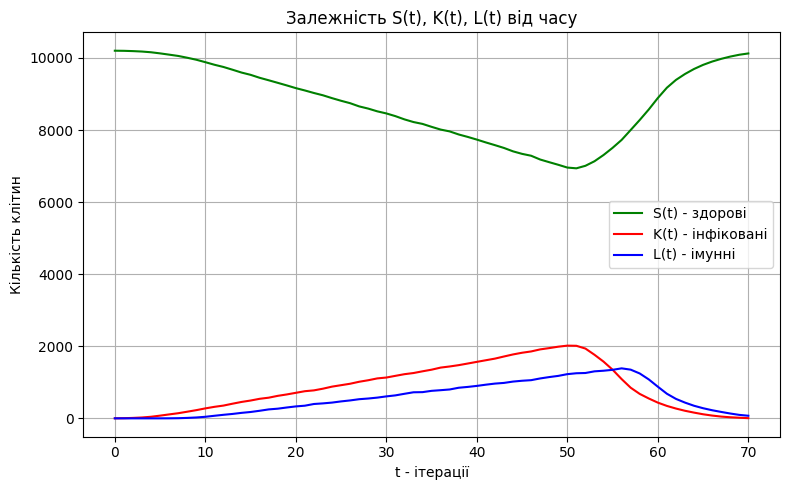

In [80]:
t = np.arange(len(S_list))

plt.figure(figsize=(8,5))
plt.plot(t, S_list, label='S(t) - здорові', color='green')
plt.plot(t, K_list, label='K(t) - інфіковані', color='red')
plt.plot(t, L_list, label='L(t) - імунні', color='blue')
plt.xlabel('t - ітерації')
plt.ylabel('Кількість клітин')
plt.title("Залежність S(t), K(t), L(t) від часу")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Вивести імовірності ураження центральної картинки залежно від кількості вже уражених сусідніх клітинок.

In [98]:
p = 0.5
k_values = np.arange(9)
P_values = 1 - (1 - p)**k_values

print(f"{'k (заражених сусідів)':>25} | {'P зараження':>12}")
print("-"*40)
for k, P in zip(k_values, P_values):
    print(f"{k:>25} | {P:>12.6f}")


    k (заражених сусідів) |  P зараження
----------------------------------------
                        0 |     0.000000
                        1 |     0.500000
                        2 |     0.750000
                        3 |     0.875000
                        4 |     0.937500
                        5 |     0.968750
                        6 |     0.984375
                        7 |     0.992188
                        8 |     0.996094


### Завдання 3. Реалізувати комп’ютерну модель «Розповсюдження лісової пожежі».Можна використовувати наступні правила:
- клітини можуть бути в трьох станах: 0 –
порожня область, 1 – палаюча область, 2 –
область лісу;
- якщо один або більше з 4-х сусідів має
палаючий стан, а сама клітина є областю
лісу, новий її стан буде дорівнювати 1;
- існує дуже мала ймовірність (візьмемо
0,000005) того, що клітина лісу (стан 2) починає горіти сама по собі
(наприклад, від блискавки);
- клітина, що горить, стає порожньою (стан 0);
- існує невелика ймовірність (візьмемо 0,01) того, що порожня клітина стає
лісом для моделювання росту.

In [105]:
N = 100
steps = 200

pr_lightning = 0.000005  
pr_growth = 0.01         

empty = 0
burning = 1
forest = 2

grid = np.random.choice([empty, forest], N*N, p=[0.4, 0.6]).reshape(N, N)

In [106]:
def count(grid, x, y):

    total = 0
    for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
        nx, ny = x + dx, y + dy
        if 0 <= nx < N and 0 <= ny < N:
            if grid[nx, ny] == burning:
                total += 1
    return total

In [107]:
def update_grid(frame, img, grid):
    new_grid = grid.copy()
    for i in range(N):
        for j in range(N):
            if grid[i, j] == forest:
                
                if count(grid, i, j) > 0:
                    new_grid[i, j] = burning
               
                elif random.random() < pr_lightning:
                    new_grid[i, j] = burning

            elif grid[i, j] == burning:
                new_grid[i, j] = empty

            elif grid[i, j] == empty:
                if random.random() < pr_growth:
                    new_grid[i, j] = forest

    img.set_data(new_grid)
    grid[:] = new_grid[:]
    return img

### Анімація

In [108]:
fig, ax = plt.subplots() 
img = ax.imshow(grid, cmap='brg', vmin=0, vmax=2)
ax.set_title("'Розповсюдження лісової пожежі'")
ax.axis('off')

ani = animation.FuncAnimation(fig, update_grid, fargs=(img, grid), frames=steps, interval=200, repeat=False)

ani.save('forest_fire.gif', writer='pillow')
plt.close(fig)